In [1]:
import numpy as np
import matplotlib.pyplot as plt

from modelbase.ode import Model, LabelModel, LinearLabelModel, Simulator, mca
from modelbase.ode import ratefunctions as rf

In [2]:
R=Model()
R.add_compounds(["Xp","Xm","S","N","Co2"])
p={
"upmax":0.003, 
"ummax":0.05,
"y":0.001,
"m":0.09,
"Yms":0.2,
"d":1.5,
"Ypco2":0.5,
"Ypn":25,
"Ymn":25,
"Kpco2":2,
"Kms":0.05,
"Kpn":0.05,
"Kmn":0.05,
"y1":0.002,
"XpmaxB":200,
"Nadd":0.04,
"a":1000,
"VmaxBNF": 5000,
"Kbnf" : 0.001
}
R.add_parameters(p)
R.parameters

{'upmax': 0.003,
 'ummax': 0.05,
 'y': 0.001,
 'm': 0.09,
 'Yms': 0.2,
 'd': 1.5,
 'Ypco2': 0.5,
 'Ypn': 25,
 'Ymn': 25,
 'Kpco2': 2,
 'Kms': 0.05,
 'Kpn': 0.05,
 'Kmn': 0.05,
 'y1': 0.002,
 'XpmaxB': 200,
 'Nadd': 0.04,
 'a': 1000,
 'VmaxBNF': 5000,
 'Kbnf': 0.001}

In [3]:
def up (upmax,Co2,Kpco2,N,Kpn,a,Xm,y1):
    return (upmax*(Co2/(Kpco2+Co2))*(N/(Kpn+N))*(1+((a*Xm)/(1+(y1*Xm)))))
def growthratefunctionp (up,Xp):
    return (up*Xp)
def glfactorpB (up,Xp,XpmaxB):
    return (up*(Xp**2/XpmaxB))
def exufactorp (up,Xp,y):
    return (up*Xp*y)
def um (ummax,S,Kms,N,Kmn):
    return (ummax*(S/(Kms+S))*(N/(Kmn+N)))
def growthratefunctionm (um,Xm):
    return (um*Xm)
def lifesupportm (m, Xm):
    return (m*Xm)
def exufactorplantadd (y,up,Xp):
    return (y*up*Xp)
def exufactormneg  (um,Xm,Yms):
    return (um*Xm/Yms)
def Nfactormadd (m,Xm,Ymn):
    return (m*Xm/Ymn)
def Nfactormneg (um,Xm,Ymn):
    return (um*Xm/Ymn)
def Nfactorp (up, Xp, Ypn):
    return (up*Xp/Ypn)
def Nadd (Nadd):
    return (Nadd)
def Co2bacadd (d,m,Xm,Yms):
    return (d*m*Xm/Yms)
def Co2pneg (up,Xp,Ypco2):
    return (up*Xp/Ypco2)
def RBNF (VmaxBNF,S,Kbnf):
    return ((VmaxBNF*S)*(Kbnf*S))
def BNFfactor(RBNF,Xm):
    return (RBNF*Xm)

In [4]:
R.add_algebraic_module_from_args(
    module_name= "up",
    function= up,
    derived_compounds= ["up"],
    args=["upmax","Co2","Kpco2","N","Kpn","a","Xm","y1"]
)
R.add_algebraic_module_from_args(
    module_name= "um",
    function= um,
    derived_compounds= ["um"],
    args=["ummax","S","Kms","N","Kmn"]
)
R.add_algebraic_module_from_args(
    module_name= "RBNF",
    function= RBNF,
    derived_compounds= ["RBNF"],
    args=["VmaxBNF","S","Kbnf"]
)


In [5]:
R.add_reaction_from_args(
    rate_name = "growth_rate_of_plants",
    function= growthratefunctionp,
    stoichiometry= {"Xp":1},
    args=["up","Xp"]
) 
R.add_reaction_from_args(
    rate_name= "growth_limiting_factor_plants_bacteria",
    function = glfactorpB ,
    stoichiometry={"Xp":-1},
    args= ["up","Xp","XpmaxB"]
)
R.add_reaction_from_args(
    rate_name="exufactorp",
    function= exufactorp,
    stoichiometry={"Xp":-1},
    args=["up","y","Xp"]
)
R.add_reaction_from_args(
    rate_name="growth_rate_of_microbes",
    function= growthratefunctionm,
    stoichiometry={"Xm":1},
    args=["um","Xm"]
)
R.add_reaction_from_args(
    rate_name="lifesupportrate",
    function= lifesupportm,
    stoichiometry={"Xm":-1},
    args=["m","Xm"]
)
R.add_reaction_from_args(
    rate_name="exufactorplantadd",
    function= exufactorplantadd,
    stoichiometry={"S":1},
    args=["y","up","Xp"]
)
R.add_reaction_from_args(
    rate_name="exufactormneg",
    function= exufactormneg,
    stoichiometry={"S":-1},
    args=["um","Xm","Yms"]
)
R.add_reaction_from_args(
    rate_name="Nfactormadd",
    function= Nfactormadd,
    stoichiometry={"N":1},
    args=["m","Xm","Ymn"]
)
R.add_reaction_from_args(
    rate_name="Nfactormneg",
    function=Nfactormneg,
    stoichiometry={"N":-1},
    args=["um","Xm","Ymn"]
)
R.add_reaction_from_args(
    rate_name="Nfactorp",
    function= Nfactorp,
    stoichiometry={"N":-1},
    args=["up","Xp","Ypn"]
)
R.add_reaction_from_args(
    rate_name="Nadd",
    function=Nadd,
    stoichiometry={"N":1},
    args=["Nadd"]
)
R.add_reaction_from_args(
    rate_name="BNFfactor",
    function= BNFfactor,
    stoichiometry={"N":1},
    args=["RBNF","Xm"]
    )
R.add_reaction_from_args(
    rate_name="Co2bacadd",
    function= Co2bacadd,
    stoichiometry={"Co2":1},
    args=["d","m","Xm","Yms"]
)
R.add_reaction_from_args(
    rate_name="Co2pneg",
    function=Co2pneg,
    stoichiometry={"Co2":-1},
    args=["up","Xp","Ypco2"]
)


(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Remember to label your axes', ylabel='Remember to label your axes'>)

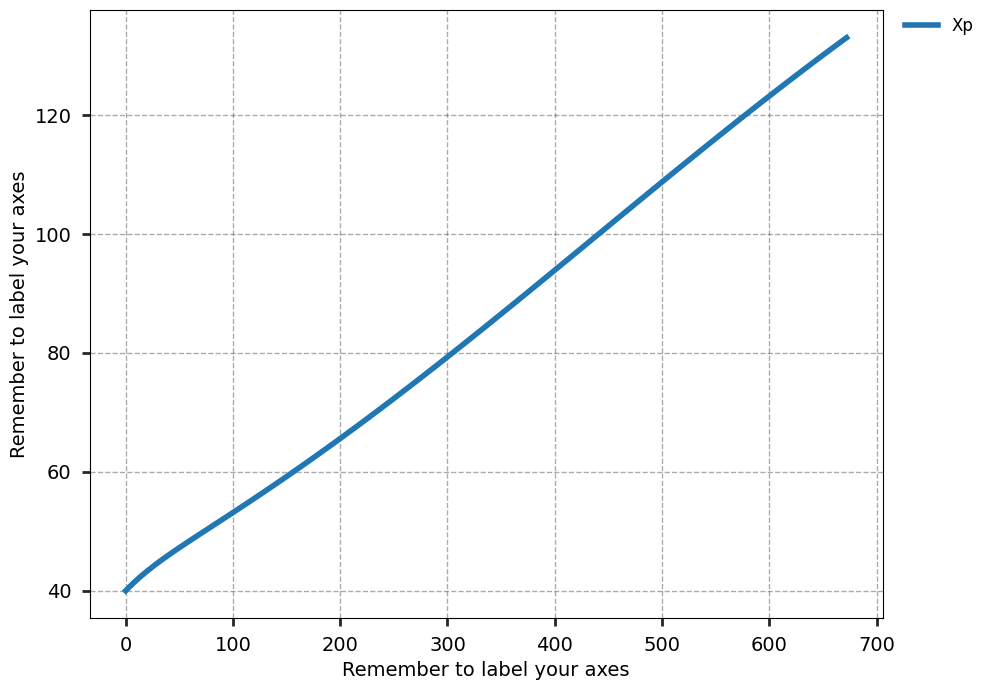

In [17]:
s=Simulator(R)
s.initialise ({"Xp":40,"Xm":0.001,"S":8,"N":8,"Co2":1000})

s.simulate(28*24)
s.plot_selection("Xp")

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Remember to label your axes', ylabel='Remember to label your axes'>)

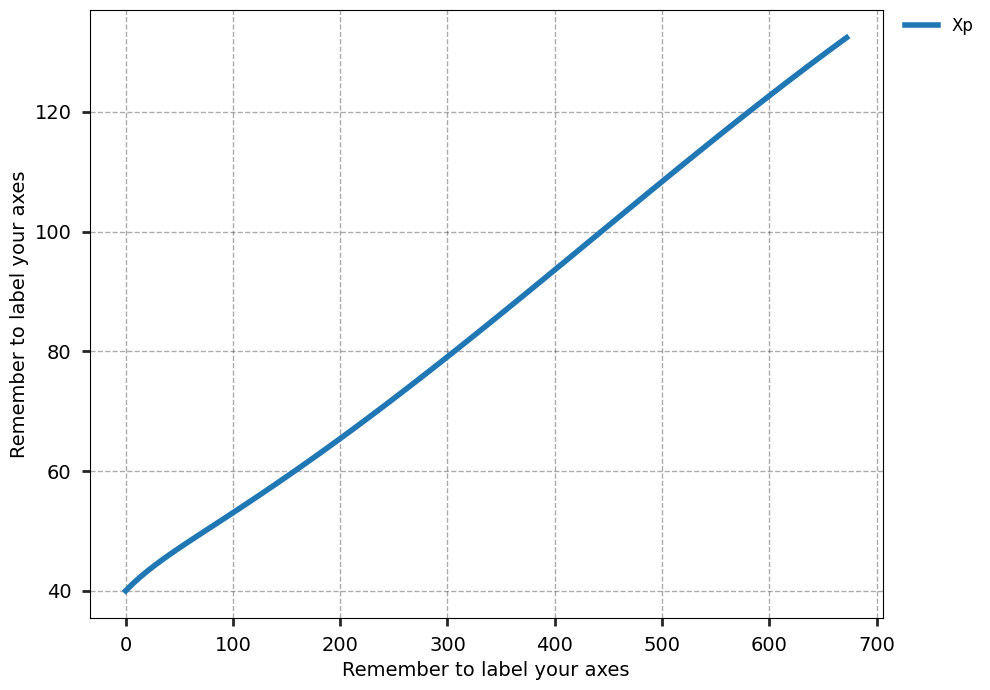

In [18]:
s=Simulator(R)
s.initialise ({"Xp":40,"Xm":0.001,"S":8,"N":1,"Co2":1000})

s.simulate(28*24)
s.plot_selection("Xp")

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Remember to label your axes', ylabel='Remember to label your axes'>)

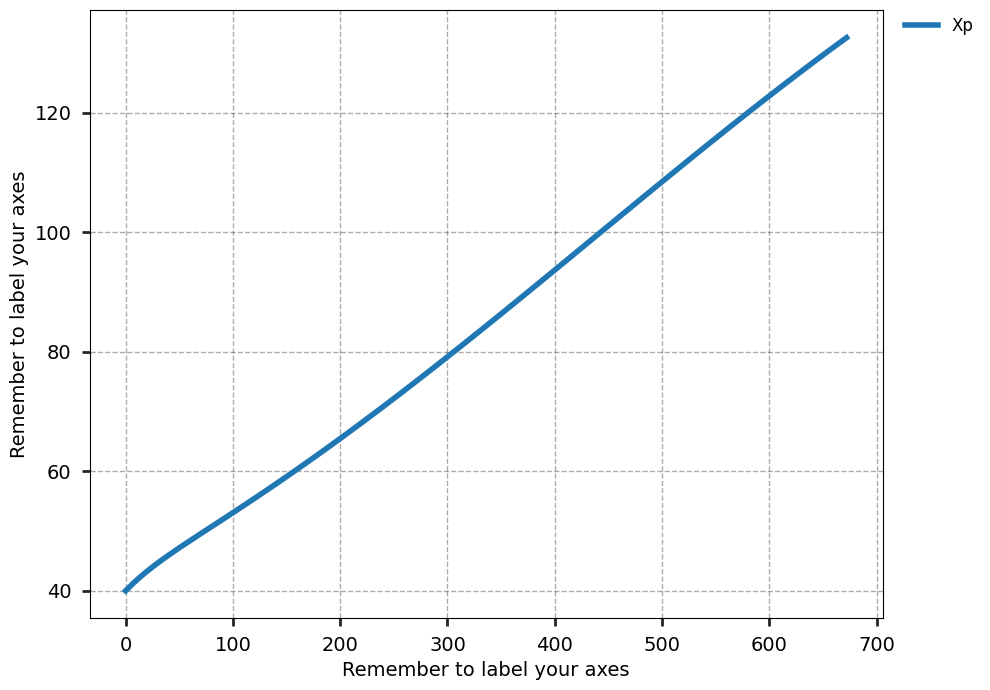

In [19]:
R.update_parameter('Nadd', 0)
s=Simulator(R)
s.initialise ({"Xp":40,"Xm":0.001,"S":8,"N":1.8,"Co2":1000})


s.simulate(28*24)
s.plot_selection ("Xp")

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Remember to label your axes', ylabel='Remember to label your axes'>)

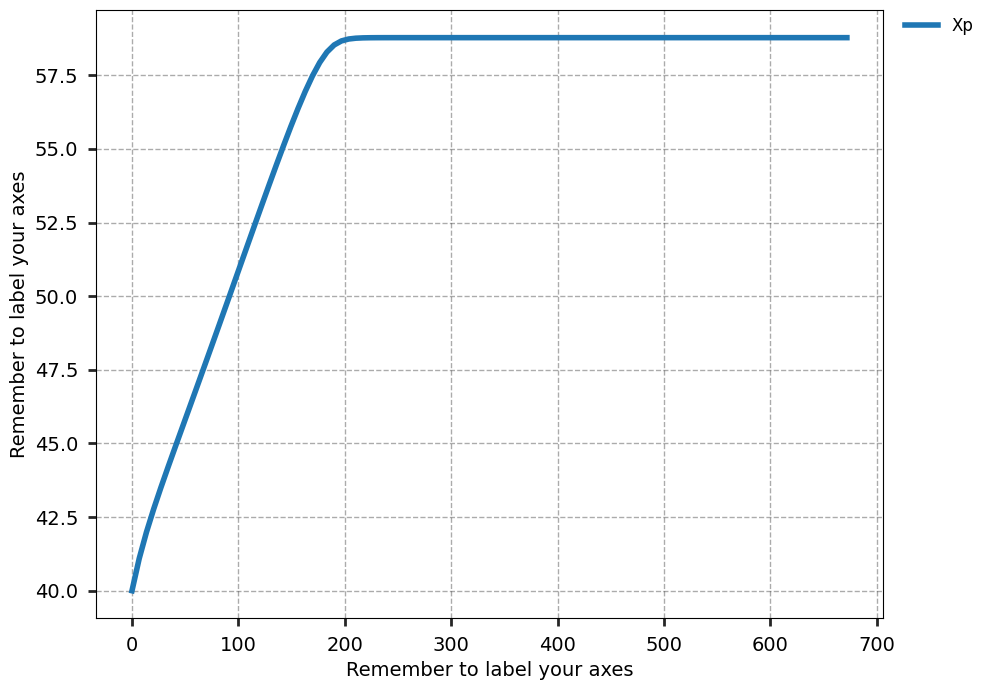

In [13]:
R.update_parameter('Nadd', 0)
s=Simulator(R)
s.initialise ({"Xp":40,"Xm":0.001,"S":0,"N":1,"Co2":1000})


s.simulate(28*24)
s.plot_selection ("Xp")

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Remember to label your axes', ylabel='Remember to label your axes'>)

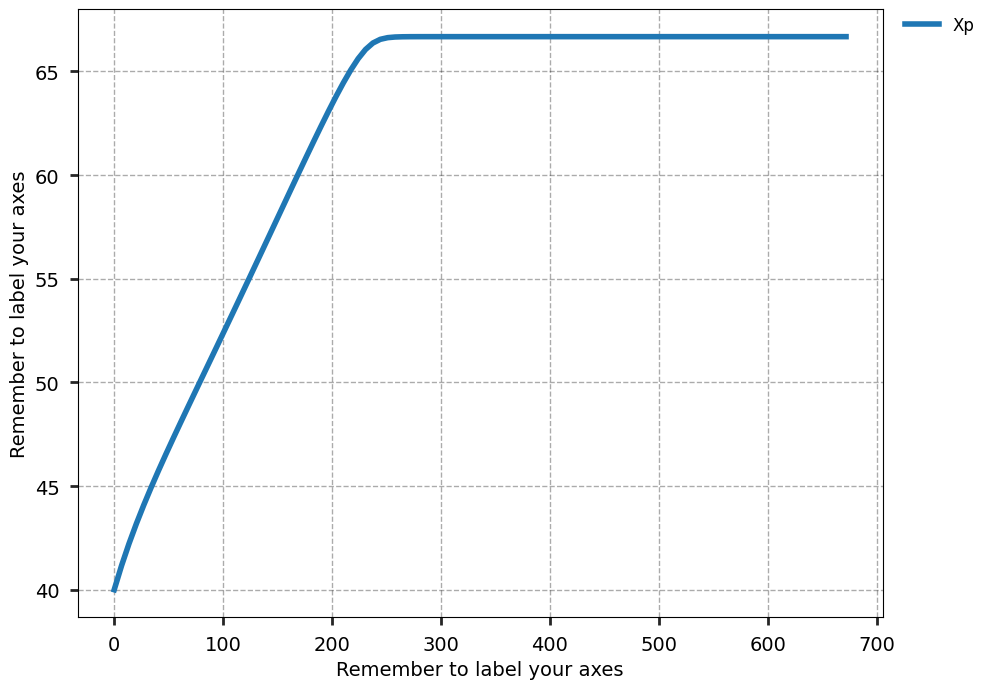

In [15]:
R.update_parameter('Nadd', 0)
s=Simulator(R)
s.initialise ({"Xp":40,"Xm":0.001,"S":2,"N":1,"Co2":1000})


s.simulate(28*24)
s.plot_selection ("Xp")

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Remember to label your axes', ylabel='Remember to label your axes'>)

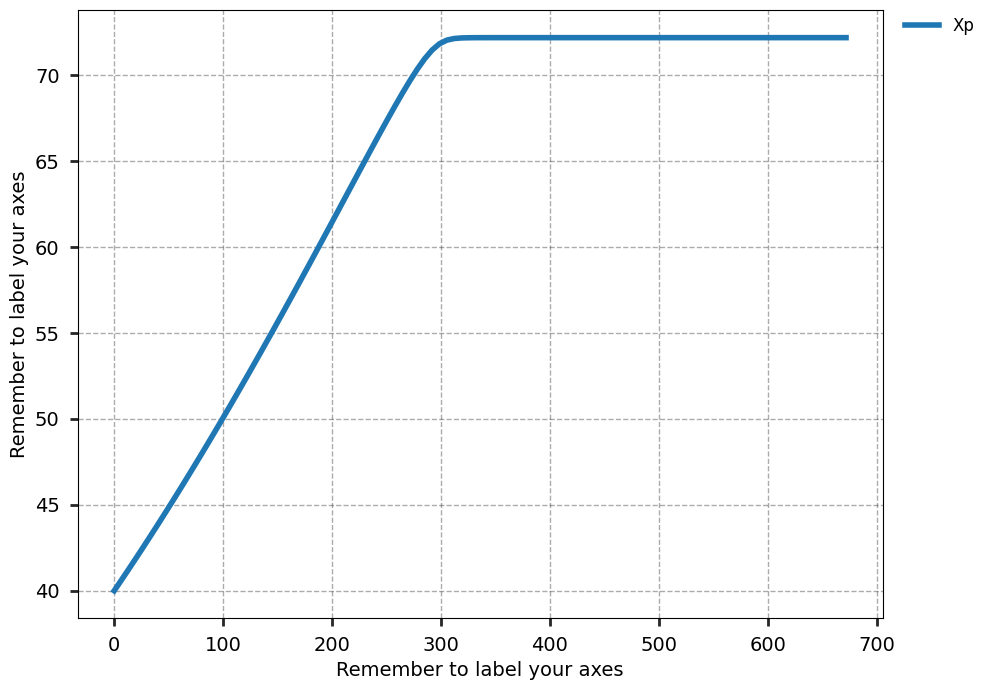

In [21]:
s=Simulator(R)
s.initialise ({"Xp":40,"Xm":0,"S":8,"N":1.8,"Co2":1000})

s.simulate(28*24)
s.plot_selection("Xp")